# Usage Library

In [318]:
import drms

from sunpy.time import TimeRange
from sunpy.instr.goes import get_goes_event_list

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

from IPython.display import display 
import pandas as pd 
from datetime import timedelta, date

# Create Solar Flare Events (Response Variables)

In [387]:
date_from = '2014/03/18 00:00'
date_to = '2014/04/06 23:59'
time_delta = 12 # in rhous

In [388]:
# Using SunPy to get the GOES flare list
time_range = TimeRange(date_from, date_to)
flare_response = pd.DataFrame.from_dict(get_goes_event_list(time_range))

In [389]:
class_mult = {'A':1e-8, 'B':1e-7, 'C':1e-6, 'M':1e-5, 'X': 1e-4}

def convert_class(c):
    cat, score = c[0], float(c[1:])
    
    return score * class_mult[cat]


flare_response['intensity'] = flare_response['goes_class'].map(convert_class)
flare_response['peak_time'] = drms.to_datetime(flare_response['peak_time'])

In [390]:
flare_res = flare_response[['peak_time', 'noaa_active_region', 'intensity']]

In [391]:
flare_res['ptim_12h_bf'] = flare_res['peak_time'].map(lambda t: t - timedelta(hours=time_delta))

/Users/vietdo/opt/anaconda2/envs/mlpy36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [392]:
flare_res.dropna(inplace=True)
flare_res.drop_duplicates(inplace=True)

/Users/vietdo/opt/anaconda2/envs/mlpy36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/vietdo/opt/anaconda2/envs/mlpy36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [393]:
display(flare_res)

,peak_time,noaa_active_region,intensity,ptim_12h_bf
0,2014-03-18 05:06:00,12010,3.400000e-06,2014-03-17 17:06:00
1,2014-03-18 06:10:00,12002,1.000000e-06,2014-03-17 18:10:00
2,2014-03-18 12:33:00,0,1.000000e-06,2014-03-18 00:33:00
3,2014-03-18 15:33:00,12010,4.700000e-06,2014-03-18 03:33:00
4,2014-03-18 22:52:00,12010,4.700000e-06,2014-03-18 10:52:00
5,2014-03-19 03:44:00,12010,1.800000e-06,2014-03-18 15:44:00
6,2014-03-19 06:52:00,12010,1.700000e-06,2014-03-18 18:52:00
7,2014-03-19 07:34:00,12010,9.900000e-06,2014-03-18 19:34:00
8,2014-03-19 11:12:00,12010,1.200000e-06,2014-03-18 23:12:00
9,2014-03-19 11:26:00,12010,4.200000e-06,2014-03-18 23:26:00


In [396]:
pd.set_option('display.max_rows', 500)
flare_res.sort_values(['peak_time', 'noaa_active_region'])

,peak_time,noaa_active_region,intensity,ptim_12h_bf
0,2014-03-18 05:06:00,12010,3.400000e-06,2014-03-17 17:06:00
1,2014-03-18 06:10:00,12002,1.000000e-06,2014-03-17 18:10:00
2,2014-03-18 12:33:00,0,1.000000e-06,2014-03-18 00:33:00
3,2014-03-18 15:33:00,12010,4.700000e-06,2014-03-18 03:33:00
4,2014-03-18 22:52:00,12010,4.700000e-06,2014-03-18 10:52:00
5,2014-03-19 03:44:00,12010,1.800000e-06,2014-03-18 15:44:00
6,2014-03-19 06:52:00,12010,1.700000e-06,2014-03-18 18:52:00
7,2014-03-19 07:34:00,12010,9.900000e-06,2014-03-18 19:34:00
8,2014-03-19 11:12:00,12010,1.200000e-06,2014-03-18 23:12:00
9,2014-03-19 11:26:00,12010,4.200000e-06,2014-03-18 23:26:00


## Solar flares from 2010/1/1 to 2015/12/31

In [117]:
xb = flare_res[(flare_res['intensity'] >= 1e-7) & (flare_res['intensity'] < 1e-6)]['intensity']
xc = flare_res[(flare_res['intensity'] >= 1e-6) & (flare_res['intensity'] < 1e-5)]['intensity']
xm = flare_res[(flare_res['intensity'] >= 1e-5) & (flare_res['intensity'] < 1e-4)]['intensity']
xx = flare_res[(flare_res['intensity'] >= 1e-4) & (flare_res['intensity'] < 1e-3)]['intensity']

In [219]:
test = flare_res.groupby(['peak_time', 'noaa_active_region' ]).count()

## Histogram for flare intensity of all classes

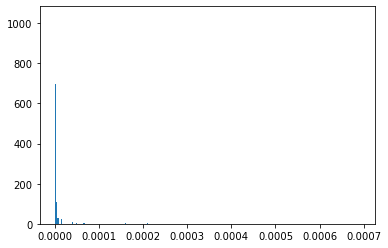

In [43]:
plt.hist(flare_res['intensity'], bins='auto') 
plt.show()

## Histogram for flare intensity class B

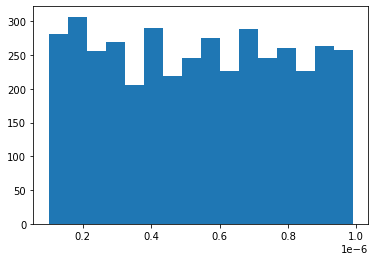

In [34]:
plt.hist(xb, bins='auto') 
plt.show()

## Histogram for flare intensity class C

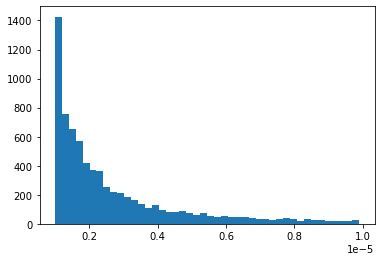

In [35]:
plt.hist(xc, bins='auto') 
plt.show()

## Histogram for flare intensity class M

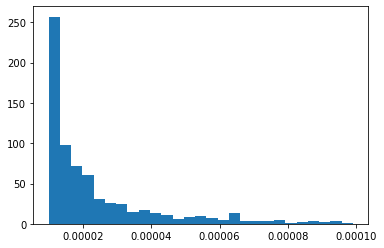

In [36]:
plt.hist(xm, bins='auto') 
plt.show()

## Histogram for flare intensity class X

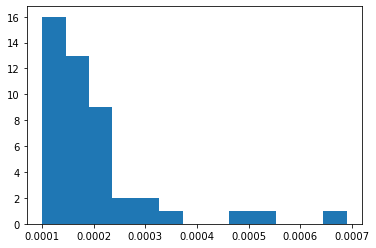

In [37]:
plt.hist(xx, bins='auto') 
plt.show()

## KDE for flare intensity of all classes

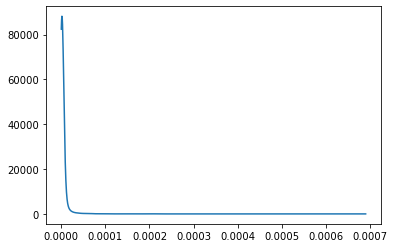

In [25]:
x = flare_res['intensity']

density = gaussian_kde(x)
xs = np.linspace(min(x),max(x),1000)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

## KDE for flare intensity of class B

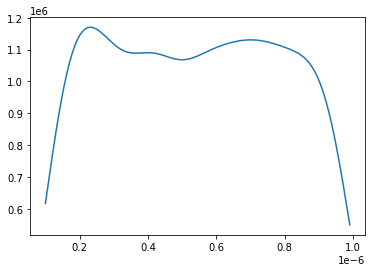

In [38]:
x = xb

density = gaussia## KDE for flare intensity of all classesn_kde(x)
xs = np.linspace(min(x),max(x),1000)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

## KDE for flare intensity class C

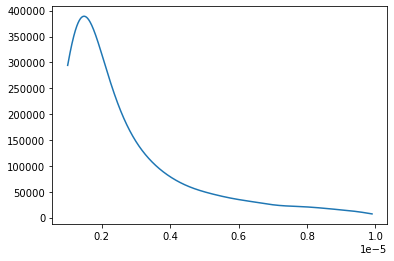

In [39]:
x = xc

density = gaussian_kde(x)
xs = np.linspace(min(x),max(x),1000)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()## KDE for flare intensity of all classes

## KDE for flare intensity class M

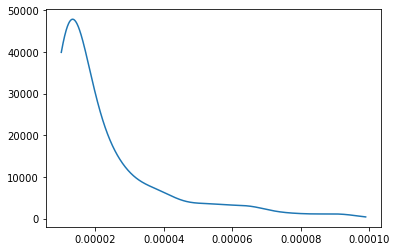

In [44]:
x = xm

density = gaussian_kde(x)
xs = np.linspace(min(x),max(x),1000)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

## KDE for flare intensity class X

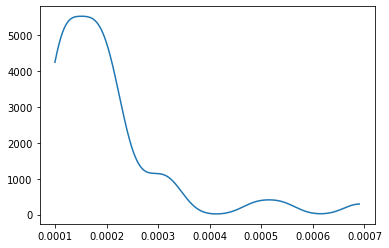

In [41]:
x = xx
density = gaussian_kde(x)
xs = np.linspace(min(x),max(x),1000)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

# Create SHARP Covariate DataTable

## pull SHARP DRMS data from JSOC

In [414]:
# create a "client"
client = drms.Client()
# Check the data series which match the "sharp"
print(client.series(r'sharp_'))
serie = 'hmi.sharp_cea_720s' # this is what we need

['hmi.sharp_720s', 'hmi.sharp_720s_nrt', 'hmi.sharp_cea_720s', 'hmi.sharp_cea_720s_nrt', 'su_jeneen.sharp_720s', 'su_jeneen.sharp_cea_720s']


In [415]:
flare_raw = client.query('hmi.sharp_cea_720s[][2014.03.18_00:00_TAI/30d@1h]',
    key=drms.const.all)

## create the local SHARP file with relevant covariates

In [416]:
flare_covariates = flare_raw[['DATE', 'DATE_S', 'DATE_B', 'T_OBS','T_REC','NOAA_AR','TOTUSJH','TOTUSJZ','SAVNCPP','USFLUX','ABSNJZH','TOTPOT', 'SIZE_ACR', 'NACR',
                             'MEANPOT', 'SIZE', 'MEANJZH', 'SHRGT45', 'MEANSHR', 'MEANJZD', 'MEANALP', 'MEANGBT',
                             'MEANGAM', 'MEANGBZ', 'MEANGBH']]

In [417]:
flare_covariates = flare_covariates.dropna()

In [418]:
flare_covariates['DATE'] = drms.to_datetime(flare_covariates['DATE'])
flare_covariates['T_REC'] = drms.to_datetime(flare_covariates['T_REC'])
flare_covariates['T_OBS'] = drms.to_datetime(flare_covariates['T_OBS'])
flare_covariates['DATE_S'] = drms.to_datetime(flare_covariates['DATE_S'])
flare_covariates['DATE_B'] = drms.to_datetime(flare_covariates['DATE_B'])

In [429]:
flare_covariates.drop_duplicates(subset=['T_REC'], keep = 'first', inplace=True)

In [430]:
pd.set_option('display.max_rows', 500)
display(flare_covariates.sort_values(['NOAA_AR','T_REC']))

,DATE,DATE_S,DATE_B,T_OBS,T_REC,NOAA_AR,TOTUSJH,TOTUSJZ,SAVNCPP,USFLUX,...,SIZE,MEANJZH,SHRGT45,MEANSHR,MEANJZD,MEANALP,MEANGBT,MEANGAM,MEANGBZ,MEANGBH
6765,2014-05-18 03:03:01,2014-04-18 03:10:47,2014-04-23 06:09:33,2014-04-12 21:00:01,2014-04-12 21:00:00,0,184.194,4.412469e+12,7.279400e+11,3.787285e+21,...,3332.937256,0.001954,2.169,22.979,0.218131,0.008168,105.888,26.991,106.523,37.277
6766,2014-05-18 03:04:39,2014-04-18 03:19:32,2014-04-23 09:26:59,2014-04-12 22:00:01,2014-04-12 22:00:00,0,171.159,4.165472e+12,1.037084e+12,3.857966e+21,...,3256.219238,0.002047,1.144,22.039,0.291439,0.009348,101.419,26.164,101.795,34.235
6767,2014-05-18 03:06:16,2014-04-18 03:28:11,2014-04-23 09:34:04,2014-04-12 23:00:01,2014-04-12 23:00:00,0,154.345,3.790702e+12,2.975963e+11,3.825954e+21,...,3160.108154,0.001114,0.567,21.057,0.084017,0.005160,99.110,25.353,99.173,32.600
6768,2014-05-18 03:07:51,2014-04-18 02:45:18,2014-04-20 23:54:40,2014-04-13 00:00:01,2014-04-13 00:00:00,0,142.216,3.559154e+12,4.825985e+11,3.762499e+21,...,3045.879150,0.001308,0.802,21.214,0.135660,0.006368,94.119,25.003,94.458,29.930
6769,2014-05-19 03:03:30,2014-04-18 02:53:57,2014-04-21 00:04:52,2014-04-13 01:00:01,2014-04-13 01:00:00,0,147.173,3.794056e+12,6.685074e+11,3.890991e+21,...,2914.955811,0.001470,0.474,21.134,0.176161,0.007608,89.851,24.985,90.110,28.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7751,2014-05-22 03:23:41,2014-04-21 02:45:01,2014-04-24 00:07:00,2014-04-16 18:00:02,2014-04-16 18:00:00,12032,753.505,1.617689e+13,5.691222e+11,1.354142e+22,...,13365.162109,-0.002941,39.637,40.275,-0.051276,-0.006050,90.568,48.374,90.404,48.105
7752,2014-05-22 03:26:52,2014-04-21 03:02:53,2014-04-23 23:51:48,2014-04-16 20:00:02,2014-04-16 20:00:00,12032,756.919,1.559172e+13,2.569077e+12,1.300271e+22,...,13051.237305,-0.004903,41.152,41.040,-0.256560,-0.009146,93.090,48.744,92.832,51.258
7753,2014-05-22 03:28:55,2014-04-21 03:11:36,2014-04-23 23:58:33,2014-04-16 21:00:02,2014-04-16 21:00:00,12032,765.712,1.653498e+13,2.311496e+12,1.308470e+22,...,12893.366211,-0.004477,43.036,42.269,-0.209697,-0.008811,90.490,49.725,90.909,49.242
7754,2014-05-22 03:30:58,2014-04-21 03:20:19,2014-04-24 00:08:13,2014-04-16 22:00:02,2014-04-16 22:00:00,12032,733.022,1.603253e+13,2.442330e+12,1.323561e+22,...,12678.748047,-0.003642,41.633,41.414,-0.072301,-0.007443,86.594,49.091,87.257,46.846


In [431]:
# Left Join flare_response with flare_covriates on noaa_active_region == NOAA_AR
flares_data = flare_res.merge(flare_covariates, how = 'left', left_on = 'noaa_active_region', right_on = 'NOAA_AR')
flares_data['abs_tim_diff'] = (flares_data['ptim_12h_bf'] -  flares_data['T_REC']).map(lambda d: abs(d.total_seconds()))
flares_data[['ptim_12h_bf', 'T_REC', 'abs_tim_diff']]

## Extract only SHARP parameters that are closest to pt_12h_bf

In [434]:
# add a min_tim_diff column which is the min time difference btw pt_12h_bf and T_REC group by Peak Time and Active Region
dfg = flares_data.groupby(['noaa_active_region','peak_time'])['abs_tim_diff']
flares_data['min_tim_diff'] = dfg.transform(min)
# pick only the row with min(min_tim_diff)
flares = flares_data.loc[flares_data['min_tim_diff'] == flares_data['abs_tim_diff'] ]

## Create final solar flares dataset

In [445]:
X_flares = flares[['TOTUSJH','TOTUSJZ','SAVNCPP','USFLUX','ABSNJZH','TOTPOT', 'SIZE_ACR', 'NACR',
                             'MEANPOT', 'SIZE', 'MEANJZH', 'SHRGT45', 'MEANSHR', 'MEANJZD', 'MEANALP', 'MEANGBT',
                             'MEANGAM', 'MEANGBZ', 'MEANGBH']]
y_flares = flares[['intensity']]

# Plot PCA-2

Text(0, 0.5, 'component 2')

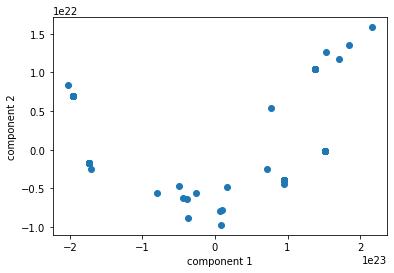

In [485]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
projected = pca.fit_transform(X_flares)

plt.scatter(projected[:, 0], projected[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')

# Inference: Regression

## Create train test split

In [448]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_flares, y_flares, test_size=0.25, random_state=42)

## Linear Regression

In [466]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [467]:
y_lr_pred = lr.predict(X_test)
print(mse(y_test, y_lr_pred))

1.734457549369788e-11


## LASSO Regression

In [478]:
lasso = linear_model.Lasso(alpha=2)
lasso.fit(X_train, y_train)

Lasso(alpha=2)

In [479]:
y_la_pred = lasso.predict(X_test)
print(mse(y_test, y_la_pred))

1.7344526705498225e-11


## Ridge Regression

In [476]:
ridge = linear_model.Ridge(alpha=2)
ridge.fit(X_train, y_train)

/Users/vietdo/opt/anaconda2/envs/mlpy36/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.13768e-49): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=2)

In [480]:
y_rid_pred = ridge.predict(X_test)
print(mse(y_test, y_rid_pred))

5.1488124025824505e-11


## Random Forest Regressor

In [481]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators = 100, random_state=0)
regr.fit(X_train, y_train)

/Users/vietdo/opt/anaconda2/envs/mlpy36/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(random_state=0)

In [482]:
y_rf_pred = regr.predict(X_test)
print(mse(y_test, y_rf_pred))

2.6197291784309164e-11
